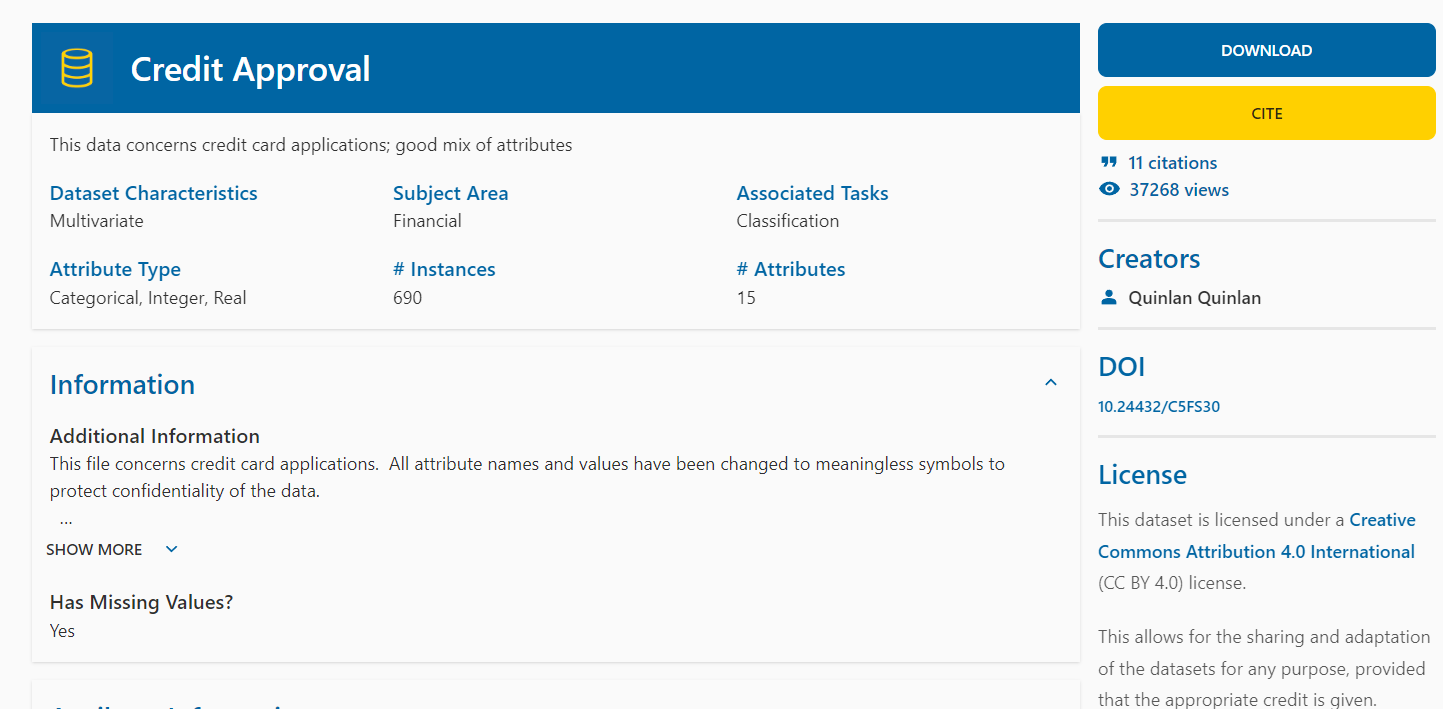

**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

### **Dataset available on:** [UCI Machine Learning Credit Approval](https://archive.ics.uci.edu/dataset/27/credit+approval) , [Kaggle](https://www.kaggle.com/datasets/impapan/credit-approval-data-set)

# **Credit Approval**


1. Title: Credit Approval

2. Sources:
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a. <br>
    A2:	continuous.<br>
    A3:	continuous. <br>
    A4:	u, y, l, t. <br>
    A5:	g, p, gg. <br>
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. <br>
    A7:	v, h, bb, j, n, z, dd, ff, o. <br>
    A8:	continuous. <br>
    A9:	t, f. <br>
    A10:	t, f. <br>
    A11:	continuous. <br>
    A12:	t, f. <br>
    A13:	g, p, s. <br>
    A14:	continuous. <br>
    A15:	continuous. <br>
    A16: +,-         (class attribute) <br>

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

9.  Class Distribution
  
    +: 307 (44.5%) <br>
    -: 383 (55.5%)


#### **Task:**   
   -  Examples represent positive and negative instances of people who were and were not
       granted credit.
   

### **Imports libraries**

In [ ]:
import pandas as pd # wrangling the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import MinMaxScaler # scale the values
from xgboost import XGBClassifier  # the XGBoost the algorithm classifier
from xgboost import plot_importance # plot the most important features
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics


### **Loading the database**

**Method 1:**

In [ ]:
"""
These steps are to add column names to the
data since the official UCI machine learning
separates the data and column names into two separate files


import csv

f = open("/content/crxdata.csv", "w")
writer = csv.DictWriter(
    f, fieldnames=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "16"])
writer.writeheader()
f.close()
"""

'\nThese steps are to add column names to the \ndata since the official UCI machine learning\nseparates the data and column names into two separate files\n\n\nimport csv\n\nf = open("/content/crxdata.csv", "w")\nwriter = csv.DictWriter(\n    f, fieldnames=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "16"])\nwriter.writeheader()\nf.close()\n'

**Method 2:**

In [ ]:
   # use pandas to import data and  rename columns
   from pandas import read_csv

   df = read_csv('crxdata.csv', header=None)
   df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
   df.to_csv('new_Credit_approval.csv')

#### **Read the csv file and study the database**

In [ ]:
# read the data using pandas
credit_approval_header = pd.read_csv('/content/new_Credit_approval.csv')

#### **Basic EDA**

In [ ]:
# display the first five rows using the head function
credit_approval_header.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
# show the column names
credit_approval_header.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

**Let's drop the 'Unnamed: 0' column since it has no meaning and was added when we were reading the data:**

In [ ]:
# drop the 'Unnamed: 0' column
credit_approval_header.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
# shape of the data
credit_approval_header.shape

(690, 16)

In [ ]:
# check for missing values
credit_approval_header.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
# check data types
credit_approval_header.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [ ]:
# create a copy of the dataset for visualization purpose
creditApproval_df = credit_approval_header.copy()
creditApproval_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [ ]:
# show the distribution of our target the data
creditApproval_df['A16'].value_counts(normalize=True)

-    0.555072
+    0.444928
Name: A16, dtype: float64

###**Lets repalce '+ to 1' and '- to 0'**

In [ ]:
creditApproval_df['A1']= creditApproval_df['A1'].replace('a.','a') # replace 'a.' to 'a'
creditApproval_df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [ ]:
creditApproval_df['A16']= creditApproval_df['A16'].replace('+','1') # replace + to 1
creditApproval_df['A16']= creditApproval_df['A16'].replace('-','0') # replace - to 0
creditApproval_df['A16']= creditApproval_df['A16'].astype(int)  # convert to type int
# print the value count of the new replaced strings
creditApproval_df['A16'].value_counts(normalize=True)

0    0.555072
1    0.444928
Name: A16, dtype: float64

### **We can see that 55.5% of the customers were not approved while 44.49% were approved.**

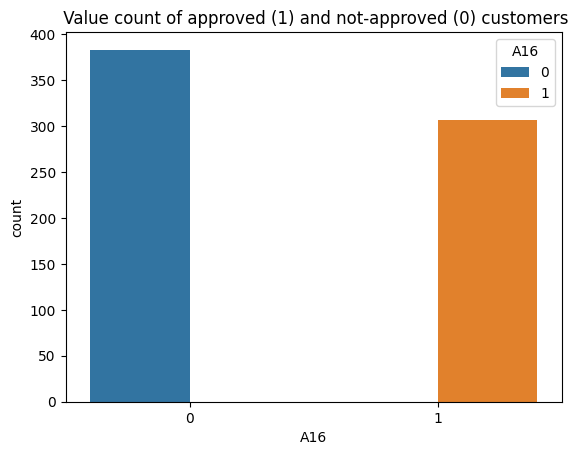

In [ ]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=creditApproval_df, x='A16', hue='A16').set(title = " Value count of approved (1) and not-approved (0) customers");

## **Preprocessing and feature engineering:**

#### **Define the target and the inputs**

#### **Create a training and a testing dataset**

In [ ]:
# this function takes in the dataset encode it and train_split the values
def encode_and_split(creditApproval_df):
    creditApproval_dum = pd.get_dummies(creditApproval_df, prefix_sep='_', drop_first=True)

    x =  creditApproval_dum.drop(['A16'], axis = 1 ) # drop the target column
    y =  creditApproval_dum['A16'] # value to be predicted


    # train_test split
    x_train, x_test, y_train, y_test = train_test_split(x, # independent or x values
                                                    y, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = y   # get a balance both in the training and test set
                                                      )

    return x_train, x_test, y_train, y_test

In [ ]:
#run encode and split
x_train, x_test, y_train, y_test = encode_and_split(creditApproval_df)

#### **Check the result from the stratification**

In [ ]:
#get training shape
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (552, 559)
Training Label Rows 552


In [ ]:
#get testing shape
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (138, 559)
Testing Label Rows 138


In [ ]:
#check class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.554348
1    0.445652
Name: A16, dtype: float64
0    0.557971
1    0.442029
Name: A16, dtype: float64


### **Rescaling the data**

**In order for the algorithm to work with the data we need to scale the data**

In [ ]:
scaling = MinMaxScaler().fit(x_train) # scaling the training set
x_train_rescaled = scaling.transform(x_train) # transform the scaled data

### **Get the best estimator of the Xgboost model using gridSearch CV:**

**Estimator:**

In [ ]:
# instantiate the estimator
estimator = XGBClassifier(
    objective= 'binary:logistic',
    random_state=0
    # early_stopping_rounds=10
)

**parameters:**

In [ ]:
# parameters to tune
parameters = {'max_depth': [4,5,6,7,8],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }

**gridsearch object:**

In [ ]:
# gridsearch object
Xgboost_grid_cv = GridSearchCV(
    estimator=estimator, # xgboostclassifier
    param_grid=parameters, # parameter
    scoring = 'roc_auc',  # roc curve visual representation to show the model's performance
    n_jobs = 10, # number of jobs
    cv = 10, # cross validation 10-folds
    verbose=True # verbose true meaning we want to see the training in real time
)

**GridSearch model:**

In [ ]:
%%time
Xgboost_grid_cv.fit(x_train_rescaled, y_train) # fit the model on the x_train_rescaled # eval_set=eval_set,   eval_set = [(X_val, y_val)]

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
CPU times: user 14.3 s, sys: 2.3 s, total: 16.6 s
Wall time: 23min 51s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             scoring='roc_auc', verbose=True)

#### **Best estimator of our brute force GridSearch CV:**

In [ ]:
# the best params
print(Xgboost_grid_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 75}


**Let us predict the above model using the .predict() method:**

In [ ]:
# assign the predicted values to y_preds
y_preds = Xgboost_grid_cv.predict(scaling.transform(x_test)) # predict test transform
# print the predicted values
print(y_preds)

[0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0]


### **Visualize the confusion Matrix**

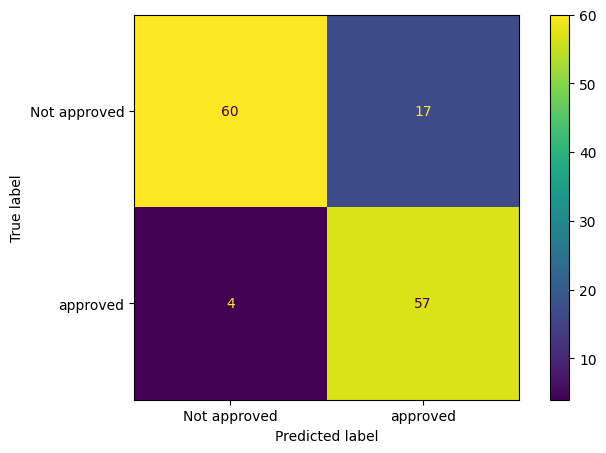

In [ ]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_preds),
    display_labels=['Not approved', "approved"]
)

cmp.plot(ax=ax);

In [ ]:
# print a summary classification_report
print(classification_report(y_test, y_preds, target_names = ['Not approved', "approved"]))

              precision    recall  f1-score   support

Not approved       0.94      0.78      0.85        77
    approved       0.77      0.93      0.84        61

    accuracy                           0.85       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.85      0.85       138



### **Feature importance:**

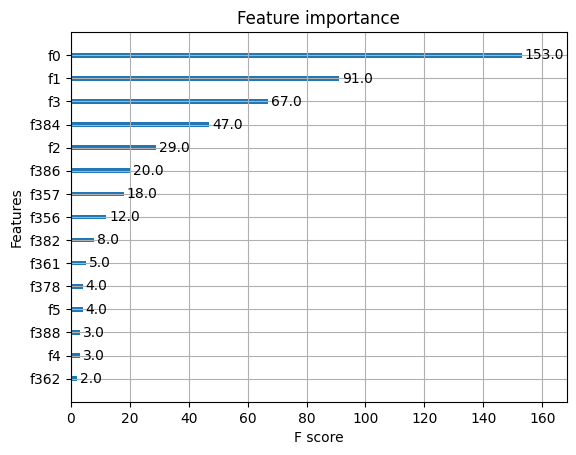

In [ ]:
plot_importance(Xgboost_grid_cv.best_estimator_);

### **Now over to you:**

*  find a dataset and apply the Xgboost Algorithm
*  find the best parameters using Gridsearch CV
*  And pickle the model

## **GOOD LUCK!**